**Ejercicio 1: Modularización y Funciones
Crea un archivo de python llamado finanzas_utils.py
Dentro de este archivo define las siguientes funciones:
1- calcular_retorno_diario(precio_actual, precio_anterior) :

*  Debe recibir dos números
*  Debe devolver el porcentaje de cambio


((precio_actual−precio_anterior)/precio_anterior)∗100

In [1]:
import yfinance as yf

#Cálculo de porcentaje de cambio entre dos precios

In [2]:
def calcular_retorno_diario(precio_actual: float, precio_anterior: float) -> float: #Quiero que el resultado sea un float
  if precio_anterior==0:
    raise ValueError('precio_anterior no puede ser o ( division por cero)') #Advierto de error en caso de precio anterior 0 y se detiene el programa en caso de valor anterior cero.
                                                                             #También lo podríamos advertir con un 'print' y 'None', pero de esta forma y ante un programa largo, se detiene
  return ((precio_actual - precio_anterior) / precio_anterior) * 100

In [3]:
def categorizar_volatilidad(desviación_estandar:float)->str: #quiero que la volatilidad sea un float y devuelva un string
  if desviación_estandar < 2:
    return 'Baja'
  elif desviación_estandar <=5:
    return 'Media'
  else:
    return 'Alta'

# EJERCICIO 2

In [4]:
!pip install yfinance

Se guardan las formulas en finanzas_utils.py :

In [5]:
%%writefile finanzas_utils.py
def calcular_retorno_diario(precio_actual, precio_anterior):
    if precio_anterior == 0:
        raise ValueError("precio_anterior no puede ser 0 (division por cero)")

    return ((precio_actual - precio_anterior) / precio_anterior) * 100


def categorizar_volatilidad(desviacion_estandar):
    if desviacion_estandar < 2:
        return "Baja"
    elif desviacion_estandar <= 5:
        return "Media"
    else:
        return "Alta"


Overwriting finanzas_utils.py


In [6]:
!cat finanzas_utils.py


def calcular_retorno_diario(precio_actual, precio_anterior):
    if precio_anterior == 0:
        raise ValueError("precio_anterior no puede ser 0 (division por cero)")

    return ((precio_actual - precio_anterior) / precio_anterior) * 100


def categorizar_volatilidad(desviacion_estandar):
    if desviacion_estandar < 2:
        return "Baja"
    elif desviacion_estandar <= 5:
        return "Media"
    else:
        return "Alta"


In [7]:
import numpy as np
import pandas as pd

from finanzas_utils import calcular_retorno_diario, categorizar_volatilidad

# ** se indica "año actual", pero cojo año entero de 2025 para poder comparar correctamente de forma mensual .

In [8]:
start_date = "2025-01-01"
end_date = "2025-12-31"


In [9]:
bbva_OHLC_df = yf.download("BBVA.MC", start=start_date, end=end_date)
SAN_OHLC_df = yf.download("SAN.MC", start=start_date, end=end_date)


/tmp/ipython-input-3951878357.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bbva_OHLC_df = yf.download("BBVA.MC", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3951878357.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SAN_OHLC_df = yf.download("SAN.MC", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [10]:
bbva_OHLC_df = yf.download(
    tickers="BBVA.MC",
    start=start_date,
    end=end_date,
    auto_adjust=False
)


[*********************100%***********************]  1 of 1 completed


In [11]:
bbva_OHLC_df.head()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC
Date,,,,,,
2025-01-02,8.782148,9.298,9.452,8.966,9.430,9691109
2025-01-03,8.801038,9.318,9.348,9.236,9.298,5626158
2025-01-06,9.203404,9.744,9.750,9.342,9.378,10516842
2025-01-07,9.326191,9.874,9.926,9.606,9.744,12689770
2025-01-08,9.352638,9.902,10.075,9.782,9.882,10062023


Obtengo lo mismmo para Banco Santander

In [12]:
SAN_OHLC_df = yf.download(
    tickers="SAN.MC",
    start=start_date,
    end=end_date,
    auto_adjust=False
)

[*********************100%***********************]  1 of 1 completed


In [13]:
SAN_OHLC_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC
Date,,,,,,
2025-01-02,4.273449,4.4030,4.486,4.2555,4.4500,26408337
2025-01-03,4.269082,4.3985,4.420,4.3795,4.4000,22705900
2025-01-06,4.416125,4.5500,4.550,4.4115,4.4300,23517368
2025-01-07,4.458830,4.5940,4.606,4.4660,4.5285,29366993
2025-01-08,4.435051,4.5695,4.660,4.5320,4.5975,23072369


In [14]:
bbva_OHLC_df.tail() #Compruebo que los datos son correctos y llegan hasta día 30 12 2025

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC
Date,,,,,,
2025-12-22,19.780001,19.780001,20.030001,19.730000,19.785000,6156999
2025-12-23,19.770000,19.770000,19.875000,19.490000,19.750000,7068285
2025-12-24,19.750000,19.750000,19.840000,19.629999,19.629999,2191002
2025-12-29,19.790001,19.790001,19.889999,19.695000,19.790001,8263136
2025-12-30,20.080000,20.080000,20.120001,19.674999,19.674999,6130969


In [15]:
SAN_OHLC_df.tail()#Compruebo que los datos son correctos y llegan hasta día 30-12-2025

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC
Date,,,,,,
2025-12-22,9.939,9.939,10.038,9.917,9.964,21241654
2025-12-23,10.002,10.002,10.026,9.845,9.950,20022685
2025-12-24,9.989,9.989,10.022,9.923,9.923,5100182
2025-12-29,9.966,9.966,10.036,9.950,9.960,23050496
2025-12-30,10.126,10.126,10.156,9.932,9.940,17490811


In [16]:
print("BBVA filas:", len(bbva_OHLC_df), "| SAN filas:", len(SAN_OHLC_df))

BBVA filas: 254 | SAN filas: 254


RENDIMIENTO ACTUAL ES :
((Precio final-Precio inicio del año)/ Precio inicio del año )*100

Seleciono el último precio para su análisis:

In [17]:
SAN_ultimo = SAN_OHLC_df["Close"].iloc[-1].item()#Con .item, convertimos en número Python directamente para evitar errores y comprueno último precio.Aquí no incluye dividendos ni splits.
bbva_ultimo = bbva_OHLC_df["Close"].iloc[-1].item()


In [18]:
print("Precio ultimo SAN:", SAN_ultimo)
print("Precio ultimo bbva:", bbva_ultimo)


Precio ultimo SAN: 10.12600040435791
Precio ultimo bbva: 20.079999923706055


In [19]:
SAN_inicio =SAN_OHLC_df["Close"].iloc[0].item()
bbva_inicio =bbva_OHLC_df["Close"].iloc[0].item()


In [20]:
print("Precio inicio SAN:", SAN_inicio)
print("Precio inicio bbva:", bbva_inicio)

Precio inicio SAN: 4.4029998779296875
Precio inicio bbva: 9.29800033569336


In [21]:
close_bbva = bbva_OHLC_df["Adj Close"]  #Para los cálculos de rentabilidades utilizaremos ADj Close para ajustanos más a la rentabilidad real incluyendo dividendos y splits
close_san = SAN_OHLC_df["Adj Close"]


In [22]:
bbva_monthly_prices = close_bbva.resample("ME").last() # agrupo todos los datos diarios por mes y tomo el últino precio de cada mes
san_monthly_prices = close_san.resample("ME").last()


In [23]:
bbva_monthly_returns = bbva_monthly_prices.pct_change().dropna() * 100 #Cáculo de los retornos mensuales.Eliminamos el error NAN incluyendo dropna, ya que el primer mes no tiene mes anterior para comparar
san_monthly_returns = san_monthly_prices.pct_change().dropna() * 100


In [24]:
bbva_retorno_mes = bbva_monthly_returns.iloc[-1].item()# Saco los retornos del último mes
san_retorno_mes = san_monthly_returns.iloc[-1].item()


In [25]:
bbva_retorno_mes


8.160513579674621

In [26]:
san_retorno_mes # En el último mes de la muestra ( diciembre 2025) Santander ha tenido un mejor rendimiento

9.553179388996359

In [27]:
bbva_retorno_anual = calcular_retorno_diario(
    close_bbva.iloc[-1].item(),
    close_bbva.iloc[0].item()
)

san_retorno_anual = calcular_retorno_diario(
    close_san.iloc[-1].item(),
    close_san.iloc[0].item()
)

bbva_retorno_anual, san_retorno_anual


(128.64564680331208, 136.9514508529444)

In [28]:
def resumir_datos(san,san_retorno_anual,año_actual):
    return (f"{nombre} tuvo un resultado de {valor:.2f} en el año {anio}.")


OBTENCIÓN DE RETORNOS DIARIOS REALES :

In [29]:
bbva_retornos = bbva_OHLC_df["Close"].pct_change().dropna() * 100
san_retornos = SAN_OHLC_df["Close"].pct_change().dropna() * 100


In [30]:
bbva_vol_diaria = float(bbva_retornos.std())#calculo de la volatilidad diaria. Incluyo float para asegurar que el retorno sea un float.
san_vol_diaria = float(san_retornos.std())

bbva_vol_diaria, san_vol_diaria


/tmp/ipython-input-612131423.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bbva_vol_diaria = float(bbva_retornos.std())#calculo de la volatilidad diaria. Incluyo float para asegurar que el retorno sea un float.
/tmp/ipython-input-612131423.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  san_vol_diaria = float(san_retornos.std())


(1.8791591886258279, 1.9886538218490157)

In [31]:
import numpy as np

bbva_vol_mensual = float(bbva_vol_diaria * np.sqrt(21))
bbva_vol_anual = float(bbva_vol_diaria * np.sqrt(252))

san_vol_mensual = float(san_vol_diaria * np.sqrt(21))
san_vol_anual = float(san_vol_diaria * np.sqrt(252))


In [32]:
bbva_cat_m = categorizar_volatilidad(bbva_vol_mensual)
bbva_cat_a = categorizar_volatilidad(bbva_vol_anual)

san_cat_m = categorizar_volatilidad(san_vol_mensual)
san_cat_a = categorizar_volatilidad(san_vol_anual)


In [33]:
print(type(bbva_OHLC_df["Close"]))# Comprobación
print(type(SAN_OHLC_df["Close"]))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [34]:
(bbva_vol_mensual, bbva_vol_anual, bbva_cat_m, bbva_cat_a,
 san_vol_mensual, san_vol_anual, san_cat_m, san_cat_a)




(8.611389224749654,
 29.83072732203514,
 'Alta',
 'Alta',
 9.11315666968634,
 31.568900738463853,
 'Alta',
 'Alta')

BBVA

Volatilidad mensual ≈ 8,16 %

Volatilidad anual ≈ 29,83 %

Categoría mensual → Alta

Categoría anual → Alta

SANTANDER

Volatilidad mensual ≈ 9,11 %

Volatilidad anual ≈ 31,56 %

Categoría mensual → Alta

Categoría anual → Alta

In [35]:
if bbva_vol_anual > san_vol_anual:
    vol_anual_comp = "BBVA tiene mayor volatilidad anual que Santander."
else:
    vol_anual_comp = "Santander tiene mayor volatilidad anual que BBVA."

if bbva_vol_mensual > san_vol_mensual:
    vol_mensual_comp = "BBVA tiene mayor volatilidad mensual que Santander."
else:
    vol_mensual_comp = "Santander tiene mayor volatilidad mensual que BBVA."

if bbva_retorno_anual > san_retorno_anual:
    mejor_anual = "BBVA ha tenido mejor rendimiento en el último año."
else:
    mejor_anual = "Santander ha tenido mejor rendimiento en el último año."

if bbva_retorno_mes > san_retorno_mes:
    mejor_mes = "BBVA ha tenido mejor rendimiento en el último mes."
else:
    mejor_mes = "Santander ha tenido mejor rendimiento en el último mes."

print(vol_mensual_comp)
print(vol_anual_comp)
print(mejor_anual)
print(mejor_mes)


Santander tiene mayor volatilidad mensual que BBVA.
Santander tiene mayor volatilidad anual que BBVA.
Santander ha tenido mejor rendimiento en el último año.
Santander ha tenido mejor rendimiento en el último mes.


RESUMEN:
BBVA es más volátil en este periodo que Santader , y ambas están clasificadas como volatilidad Alta según la clasificación realizada en la función >5

In [36]:
print(
    f"BBVA presenta una volatilidad mensual {bbva_cat_m} "
    f"y anual {bbva_cat_a}. "
    f"Santander presenta una volatilidad mensual {san_cat_m} "
    f"y anual {san_cat_a}. "
    f"En el año actual, el mejor rendimiento lo ha obtenido "
    f"{'BBVA' if bbva_retorno_anual > san_retorno_anual else 'Santander'}."
)


BBVA presenta una volatilidad mensual Alta y anual Alta. Santander presenta una volatilidad mensual Alta y anual Alta. En el año actual, el mejor rendimiento lo ha obtenido Santander.


In [37]:
def resumir_datos(nombre, valor, anio):
    return f"{nombre} tuvo un retorno de {valor:.2f} en el año {anio}."


In [38]:
resultado_retorno = resumir_datos("Santander", 136.95, 2025)
print(resultado_retorno)


Santander tuvo un retorno de 136.95 en el año 2025.


EJERCICIO 3

In [39]:
SAN_OHLC_df['SMA_50'] = SAN_OHLC_df['Close'].rolling(window=50).mean()
SAN_OHLC_df['SMA_200'] = SAN_OHLC_df['Close'].rolling(window=200).mean()


In [40]:
import matplotlib.pyplot as plt


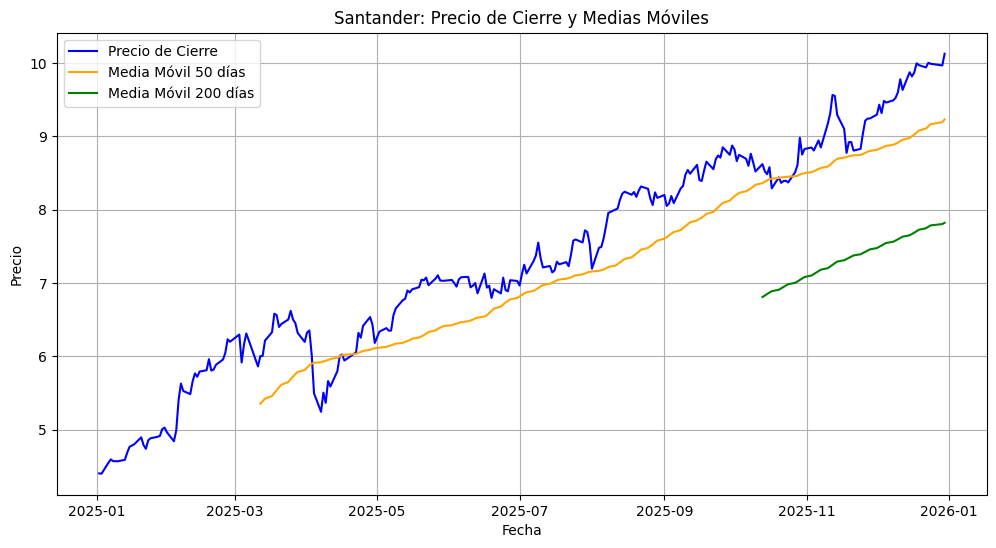

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(SAN_OHLC_df.index, SAN_OHLC_df['Close'], label='Precio de Cierre', color='blue')
plt.plot(SAN_OHLC_df.index, SAN_OHLC_df['SMA_50'], label='Media Móvil 50 días', color='orange')
plt.plot(SAN_OHLC_df.index, SAN_OHLC_df['SMA_200'], label='Media Móvil 200 días', color='green')

plt.title('Santander: Precio de Cierre y Medias Móviles')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid()
plt.show()


EN LA GRÁFICA SE OBSERVA UNA TENDENCIA FUERTE ALCISTA QUE HACE QUE LA MEDIA MOVIL SE SITUE POR DEBAJO DEL GRÁFICO, ACTUANDO COMO SOPORTE . PARA QUE SE CRUCEN LAS MEDIAS DEBEMOS AMPLIAR EL RANGO TEMPORAL

In [42]:
san_OHLC_5Adf = yf.download("SAN.MC", start="2020-01-01", end="2025-12-31")#AMPLIO RANGO TEMPORAL A 5 AÑOS DE 2020 A 2025

/tmp/ipython-input-2626008046.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  san_OHLC_5Adf = yf.download("SAN.MC", start="2020-01-01", end="2025-12-31")#AMPLIO RANGO TEMPORAL A 5 AÑOS DE 2020 A 2025
[*********************100%***********************]  1 of 1 completed


In [43]:
print(SAN_OHLC_df[['Close', 'SMA_50', 'SMA_200']].tail(10))
# COMPRUEBO LAS COLUMNAS, PUESTO QUE ME ESTABA DANDO ERROR PARA GRAFICAR

Price        Close   SMA_50   SMA_200
Ticker      SAN.MC                   
Date                                 
2025-12-15   9.873  8.97656  7.649825
2025-12-16   9.817  9.00096  7.667355
2025-12-17   9.871  9.02314  7.685595
2025-12-18   9.995  9.05010  7.705815
2025-12-19   9.970  9.07910  7.726355
2025-12-22   9.939  9.10546  7.746040
2025-12-23  10.002  9.13506  7.766020
2025-12-24   9.989  9.16518  7.784895
2025-12-29   9.966  9.19292  7.803090
2025-12-30  10.126  9.22962  7.820820


In [44]:
print(san_OHLC_5Adf.columns)


MultiIndex([( 'Close', 'SAN.MC'),
            (  'High', 'SAN.MC'),
            (   'Low', 'SAN.MC'),
            (  'Open', 'SAN.MC'),
            ('Volume', 'SAN.MC')],
           names=['Price', 'Ticker'])


In [45]:
san_OHLC_5Adf['SMA_50'] = san_OHLC_5Adf['Close'].rolling(50).mean()
san_OHLC_5Adf['SMA_200'] = san_OHLC_5Adf['Close'].rolling(200).mean()


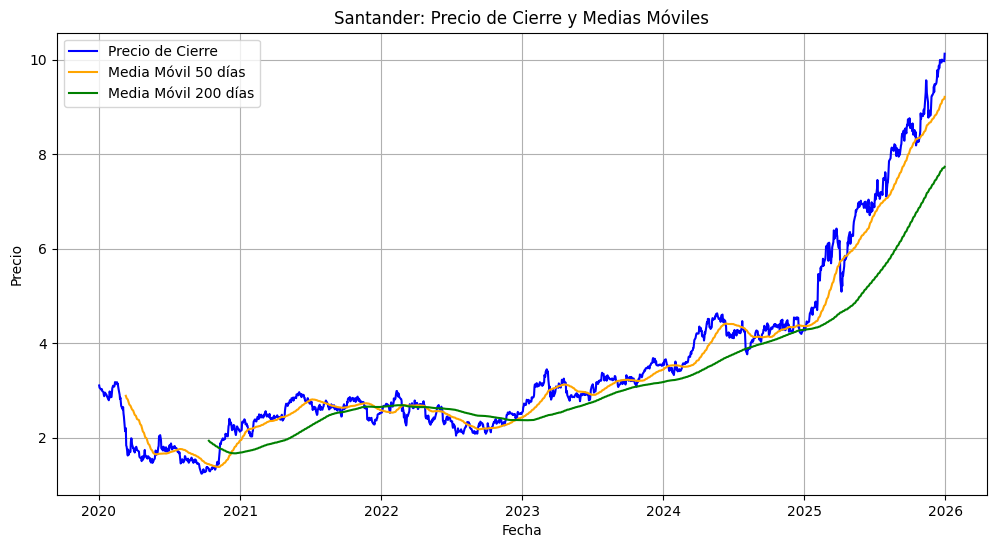

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(san_OHLC_5Adf.index, san_OHLC_5Adf['Close'], label='Precio de Cierre', color='blue')
plt.plot(san_OHLC_5Adf.index, san_OHLC_5Adf['SMA_50'], label='Media Móvil 50 días', color='orange')
plt.plot(san_OHLC_5Adf.index, san_OHLC_5Adf['SMA_200'], label='Media Móvil 200 días', color='green')

plt.title('Santander: Precio de Cierre y Medias Móviles')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid()
plt.show()

AHORA YA VEMOS LA EVOLUCIÓN DE LAS MEDIAS MÓVILES  AL AMPLIAR EL RATIO TEMPORAL HASTA 5 AÑOS.

In [47]:
san_OHLC_5Adf['Diff'] = san_OHLC_5Adf['SMA_50'] - san_OHLC_5Adf['SMA_200']


In [48]:
san_OHLC_5Adf['Signal'] = 0
san_OHLC_5Adf.loc[san_OHLC_5Adf['Diff'] > 0, 'Signal'] = 1
san_OHLC_5Adf.loc[san_OHLC_5Adf['Diff'] < 0, 'Signal'] = -1


In [49]:
san_OHLC_5Adf['Cross'] = san_OHLC_5Adf['Signal'].diff()


In [50]:
golden_cross = san_OHLC_5Adf[san_OHLC_5Adf['Cross'] == 2]
death_cross = san_OHLC_5Adf[san_OHLC_5Adf['Cross'] == -2]


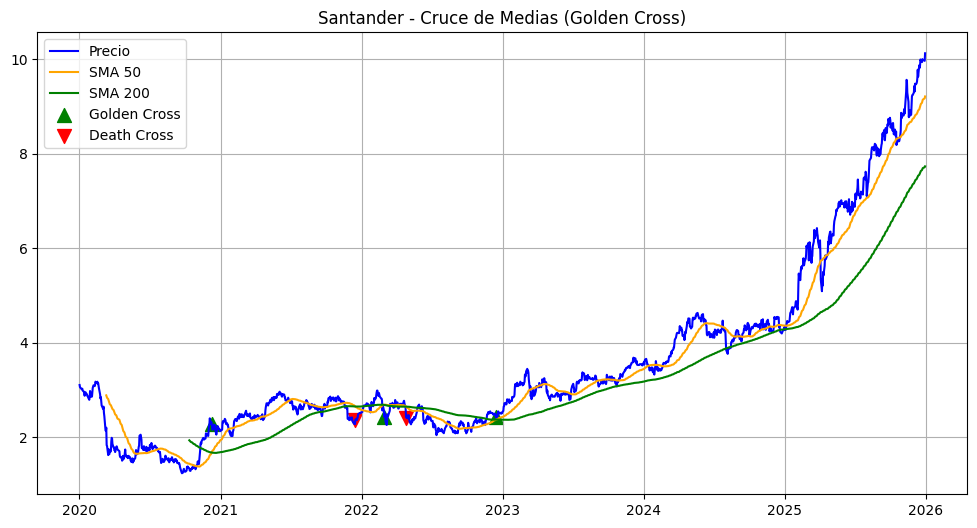

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(san_OHLC_5Adf.index, san_OHLC_5Adf['Close'], label='Precio', color='blue')
plt.plot(san_OHLC_5Adf.index, san_OHLC_5Adf['SMA_50'], label='SMA 50', color='orange')
plt.plot(san_OHLC_5Adf.index, san_OHLC_5Adf['SMA_200'], label='SMA 200', color='green')

# Marcar Golden Cross
plt.scatter(golden_cross.index, golden_cross['Close'],
            marker='^', color='green', s=100, label='Golden Cross')

# Marcar Death Cross
plt.scatter(death_cross.index, death_cross['Close'],
            marker='v', color='red', s=100, label='Death Cross')

plt.title('Santander - Cruce de Medias (Golden Cross)')
plt.legend()
plt.grid()
plt.show()


# **EJERCICIO 4 : ANÁLISIS DE SERIES TEMPORALES **

In [52]:
import pandas as pd

rango_completo = pd.date_range(
    start=san_OHLC_5Adf.index.min(),
    end=san_OHLC_5Adf.index.max(),
    freq="D"
)

san_rango_completo = san_OHLC_5Adf.reindex(rango_completo)
 # SOLICITO EL RANGO COMPLETO INCLUYENDO FRECCUENCIA DIARIA PARA QUE NOS DEVUELVA LOS VALORES NULOS DEL FIN DE SEMANA. HE SOLICITADO DESDE LA PRIMERA FILA HASTA LA ÚLTIMA Y HE UTILIZADO EL RANGO REALIZADO ANTERIORMENTE DESDE 2020 HASTA 2025



In [53]:
san_OHLC_5Adf.index = pd.to_datetime(san_OHLC_5Adf.index) #CONFIRMO QUE SE TRATA DE UN DATAFRAME



In [54]:
nulos = san_rango_completo["Close"].isna().sum() #OBTENGO LOS NULOS EN ESTOS 5 AÑOS Y EL NUMERO DE NANS ES DE 655
print("Número de valores nulos generados:", nulos)


Número de valores nulos generados: Ticker
SAN.MC    655
dtype: int64


In [55]:
san_rango_completo["Close"] = san_rango_completo["Close"].ffill()


In [56]:
print(san_rango_completo.loc["2022-06-10":"2022-06-13", "Close"])#COMPROBACIÓN DE QUE EL PRECIO DE SABADO Y DOMINGO ES EL MISMO QUE EL VIERNES


Ticker        SAN.MC
2022-06-10  2.357824
2022-06-11  2.357824
2022-06-12  2.357824
2022-06-13  2.279666


In [57]:
close_san = san_rango_completo["Close"]
if hasattr(close_san, "columns"):      # por si fuera DataFrame
    close_san = close_san.iloc[:, 0]   # primera columna

# Precio promedio de cierre por mes (fin de mes)
san_close_mensual_mean = close_san.resample("ME").mean()
san_close_mensual_mean.head()


,SAN.MC
2020-01-31,2.943219
2020-02-29,3.006287
2020-03-31,2.016167
2020-04-30,1.652277
2020-05-31,1.570281


# **GRAFICA DEL ÚLTIMO AÑO**

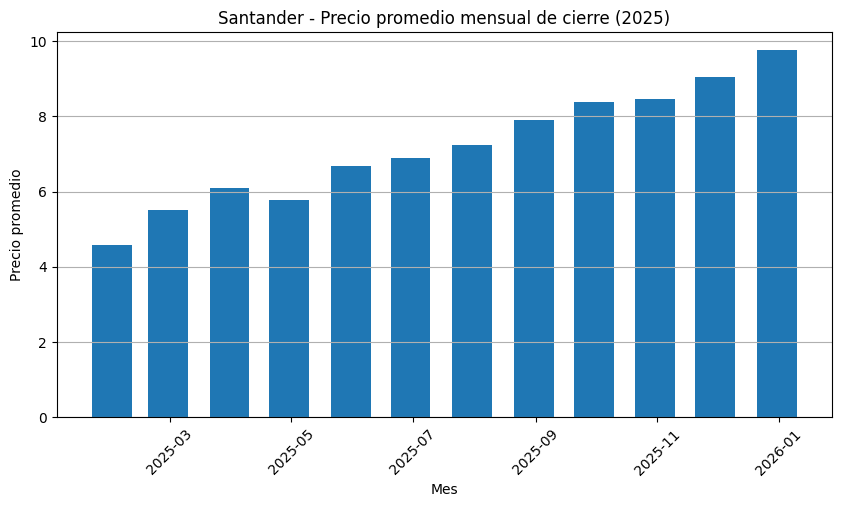

In [61]:
import matplotlib.pyplot as plt

ultimo_año= san_close_mensual_mean.index.max().year
san_ultimo_año = san_close_mensual_mean[str(ultimo_año)]

plt.figure(figsize=(10,5))
plt.bar(san_ultimo_año.index, san_ultimo_año.values,width=20)
plt.title(f"Santander - Precio promedio mensual de cierre ({ultimo_año})")
plt.xlabel("Mes")
plt.ylabel("Precio promedio")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


# **EJERCICIO 5 WEB SCRAPING AUTOMÁTICO**

In [64]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)

tablas = pd.read_html(response.text)

len(tablas)


/tmp/ipython-input-766108425.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablas = pd.read_html(response.text)


2

# OBTENCIÓN DE DATOS DE LAS TABLAS SP500 Y TABLA DE CAMBIOS DE **SP500**

In [65]:
sp500_df = tablas[0]
cambios_df = tablas[1]

sp500_df.head()


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [66]:
cambios_df.head()

Effective Date  Added                      Removed  \
      Effective Date Ticker             Security  Ticker   
0   February 9, 2026   CIEN                Ciena     DAY   
1  December 22, 2025    CRH                  CRH     LKQ   
2  December 22, 2025   CVNA              Carvana    SOLS   
3  December 22, 2025    FIX  Comfort Systems USA     MHK   
4  December 11, 2025   ARES      Ares Management       K   

                                                                Reason  
                      Security                                  Reason  
0                     Dayforce  Thoma Bravo L.P. acquired Dayforce.[6]  
1              LKQ Corporation        Market capitalization change.[7]  
2  Solstice Advanced Materials        Market capitalization change.[7]  
3            Mohawk Industries        Market capitalization change.[7]  
4                    Kellanova        Mars Inc. acquired Kellanova.[8]

# **GUARDAR LAS TABLAS EN CSV DISTINTOS**

In [67]:
sp500_df = tablas[0]
cambios_df = tablas[1]

sp500_df.to_csv("sp500_companies.csv", index=False)
cambios_df.to_csv("sp500_changes.csv", index=False)

print("CSV guardados: sp500_companies.csv y sp500_changes.csv")


CSV guardados: sp500_companies.csv y sp500_changes.csv


In [69]:
print(sp500_df.columns)
#COMPRUEBO EL NOMBRE DE LAS COLUMNAS

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')


In [76]:
def resumen_sp500(empresa_antigua, fecha_antigua,
                  empresa_mas_entra, veces_entra,
                  empresa_mas_sale, veces_sale):

    return (
        f"La empresa más antigua del índice S&P 500 es {empresa_antigua}, "
        f"incorporada el {fecha_antigua}. "
        f"La empresa que más veces ha entrado en el índice es {empresa_mas_entra} "
        f"({veces_entra} veces), mientras que la que más veces ha salido es "
        f"{empresa_mas_sale} ({veces_sale} veces)."
    )


In [77]:
col_fecha = "Date added"

sp500_df[col_fecha] = pd.to_datetime(sp500_df[col_fecha], errors="coerce")

fila_antigua = sp500_df.loc[sp500_df[col_fecha].idxmin(), ["Security", "Symbol", col_fecha]]
print("Empresa más antigua (según Date added):")
print(fila_antigua)


Empresa más antigua (según Date added):
Security                       3M
Symbol                        MMM
Date added    1957-03-04 00:00:00
Name: 0, dtype: object


In [78]:
print(cambios_df.columns)


MultiIndex([('Effective Date', 'Effective Date'),
            (         'Added',         'Ticker'),
            (         'Added',       'Security'),
            (       'Removed',         'Ticker'),
            (       'Removed',       'Security'),
            (        'Reason',         'Reason')],
           )


In [79]:
#CALCULO DE EMPRESAS QUE MÁS VECES ENTRAN Y SALEN
added_sec = ('Added', 'Security')
removed_sec = ('Removed', 'Security')

entradas = cambios_df[added_sec].dropna().value_counts()
salidas  = cambios_df[removed_sec].dropna().value_counts()

mas_entra = entradas.idxmax()
mas_entra_veces = int(entradas.max())

mas_sale = salidas.idxmax()
mas_sale_veces = int(salidas.max())

print("Más veces ha entrado:", mas_entra, "-", mas_entra_veces, "veces")
print("Más veces ha salido:", mas_sale, "-", mas_sale_veces, "veces")


Más veces ha entrado: Kraft Foods - 2 veces
Más veces ha salido: Cooper Industries - 2 veces


In [81]:
resumen = resumen_sp500(
    empresa_antigua=f"{fila_antigua['Security']} ({fila_antigua['Symbol']})",
    fecha_antigua=str(fila_antigua['Date added'].date()),
    empresa_mas_entra=mas_entra,
    veces_entra=mas_entra_veces,
    empresa_mas_sale=mas_sale,
    veces_sale=mas_sale_veces
)

print(resumen)


La empresa más antigua del índice S&P 500 es 3M (MMM), incorporada el 1957-03-04. La empresa que más veces ha entrado en el índice es Kraft Foods (2 veces), mientras que la que más veces ha salido es Cooper Industries (2 veces).
